In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("vendas_limpo.xlsx")

loja
Chuva Clara    167110.14
Porto Sol      148059.25
Vento Norte    160780.08
Vila Neve      144611.09
Name: valor_venda, dtype: float64


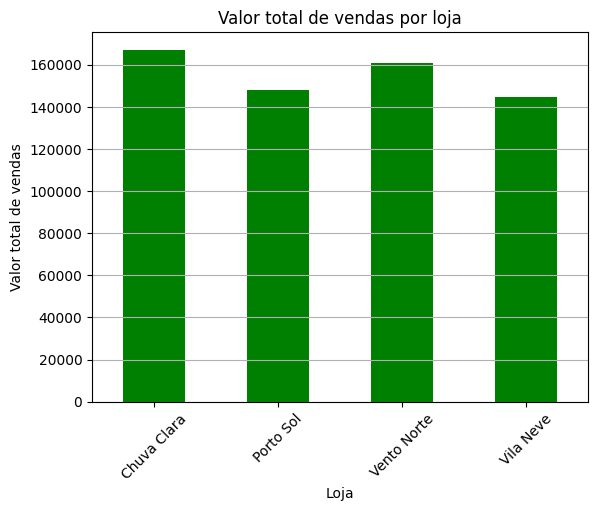

In [2]:
total_valor_vendas_loja = df.groupby('loja')['valor_venda'].sum()

print(total_valor_vendas_loja)

total_valor_vendas_loja.plot(kind='bar', color='green')
plt.title('Valor total de vendas por loja')
plt.xlabel('Loja')
plt.ylabel('Valor total de vendas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show() 

categoria    Eletrodomesticos  Infantil    Roupas   Sazonal
data_mensal                                                
2024-01               8306.95   9067.96  20283.76  23033.04
2024-02               9990.46  20101.84    689.72  14065.56
2024-03              15173.13  13744.92  17997.83  19274.74
2024-04              11059.70   5890.58  15821.84  10284.33
2024-05               4693.03  11194.30  18338.17  14509.55
2024-06              10896.41   8411.58  17079.16  19925.65
2024-07              10910.29  12119.18  17853.96  11776.51
2024-08              16296.61   8964.26   6971.17  15180.66
2024-09              16137.61  20559.91  16169.66   4391.70
2024-10               7132.03  21833.90   5908.76  13741.88
2024-11               6886.45  12688.64  12238.19  22057.77
2024-12               8101.99  13063.94  12559.21   7182.07


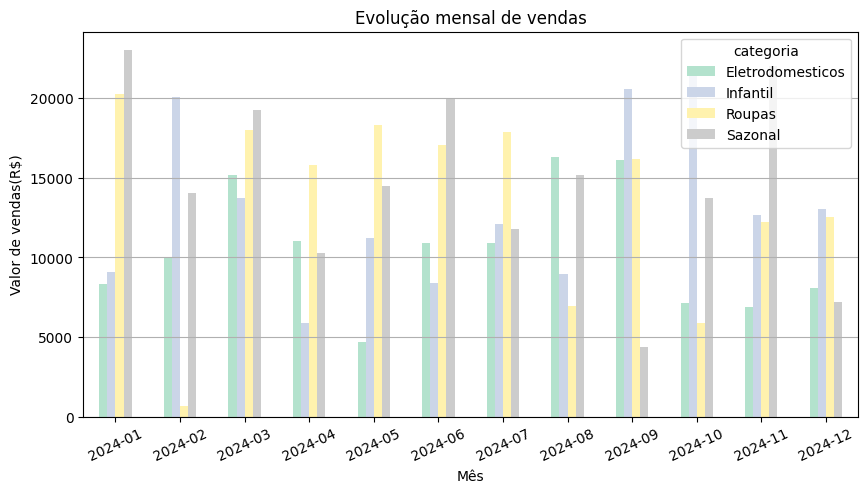

In [3]:
df_analise = df
df_analise['data_mensal'] = df_analise['data'].dt.to_period('M')
tab_vendas_mensais = df.groupby(['data_mensal', 'categoria'])['valor_venda'].sum().unstack()
print(tab_vendas_mensais)


tab_vendas_mensais.plot(kind='bar', colormap='Pastel2', figsize=(10,5))
plt.title('Evolução mensal de vendas')
plt.xlabel('Mês')
plt.ylabel('Valor de vendas(R$)')
plt.xticks(rotation=25)
plt.grid(axis= 'y')
plt.show()

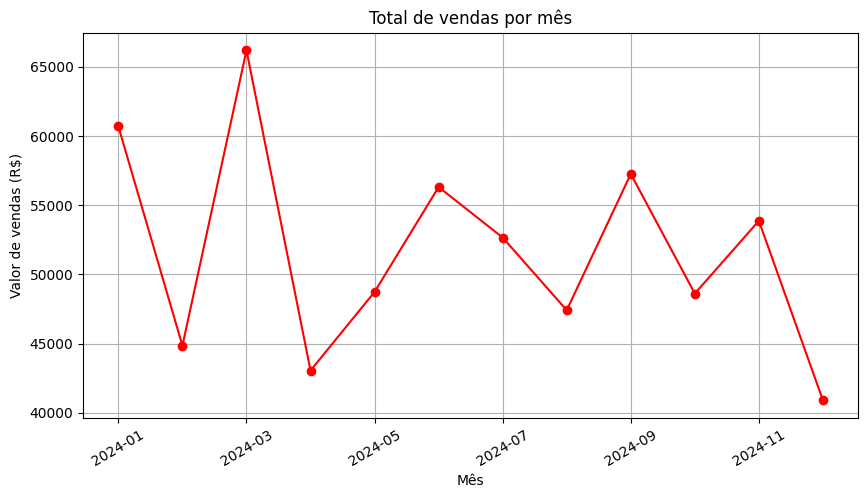

In [4]:
df_analise['data_mensal'] = df_analise['data'].dt.strftime('%Y-%m')  # Transforma em string

tab_vendas_mensais = df.groupby(['data_mensal'])['valor_venda'].sum()

tab_vendas_mensais.plot(kind='line',
                        figsize=(10, 5),
                        color='red',
                        marker='o')
plt.title('Total de vendas por mês')
plt.xlabel('Mês')
plt.ylabel('Valor de vendas (R$)')
plt.xticks(rotation=30)
plt.grid(True)

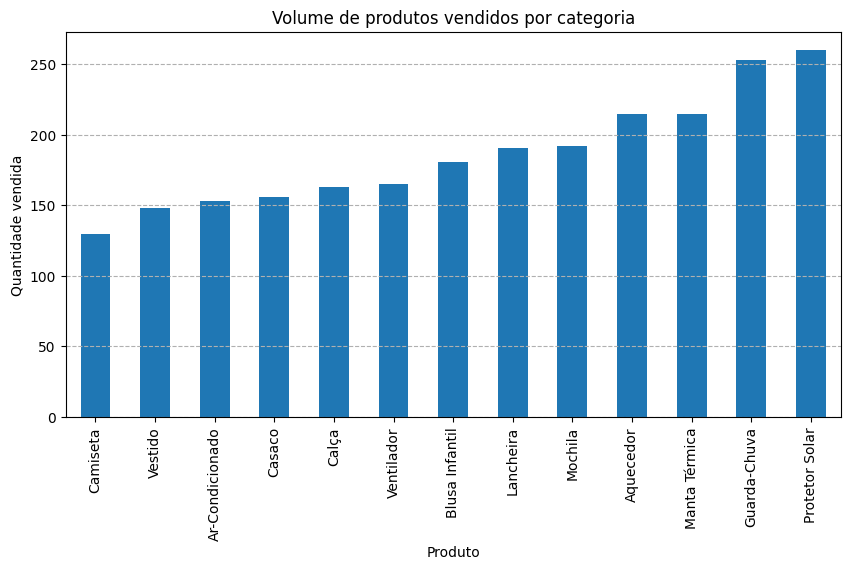

In [5]:
quantidade_produtos_vendidos = df.groupby('produto')['quantidade'].sum().sort_values()

quantidade_produtos_vendidos.plot(kind='bar', figsize=(10,5))
plt.title('Volume de produtos vendidos por categoria')
plt.ylabel('Quantidade vendida')
plt.xlabel('Produto')
plt.grid(axis='y', linestyle='--')
plt.show()

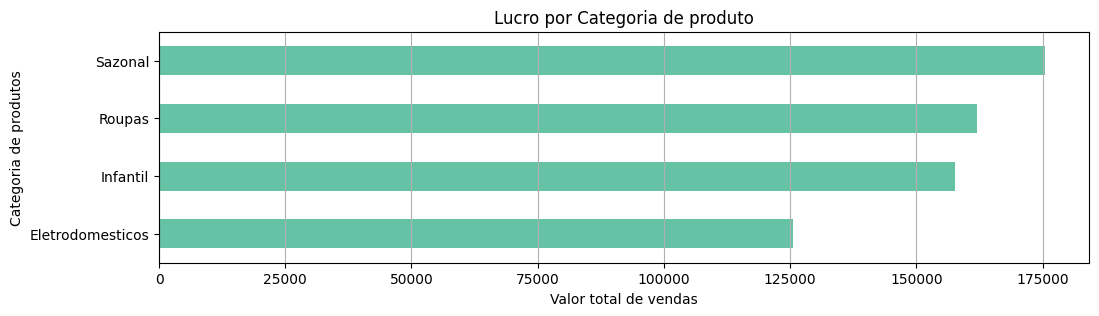

In [6]:
lucro_categoria = df.groupby('categoria')['valor_venda'].sum().sort_values()
lucro_categoria.plot(kind='barh', figsize=(12,3), colormap='Set2')
plt.title('Lucro por Categoria de produto')
plt.xlabel('Valor total de vendas')
plt.ylabel('Categoria de produtos')
plt.grid(axis='x', linestyle='-')
plt.show()

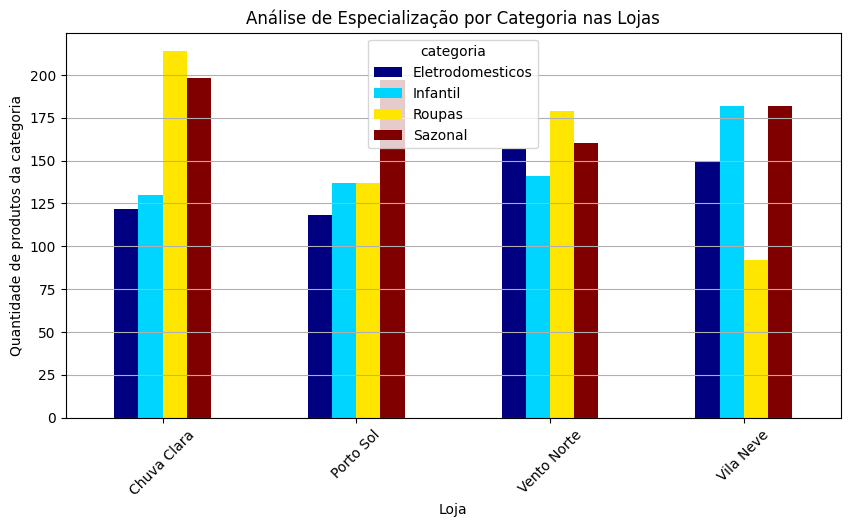

In [9]:
categoria_lojas = df.groupby(['loja', 'categoria'])['quantidade'].sum().unstack()
categoria_lojas.plot(kind='bar', figsize=(10, 5), colormap='jet')
plt.title('Análise de Especialização por Categoria nas Lojas')
plt.xticks(rotation=45)
plt.xlabel('Loja')
plt.ylabel('Quantidade de produtos da categoria')
plt.grid(axis='y', linestyle='-')
plt.show()

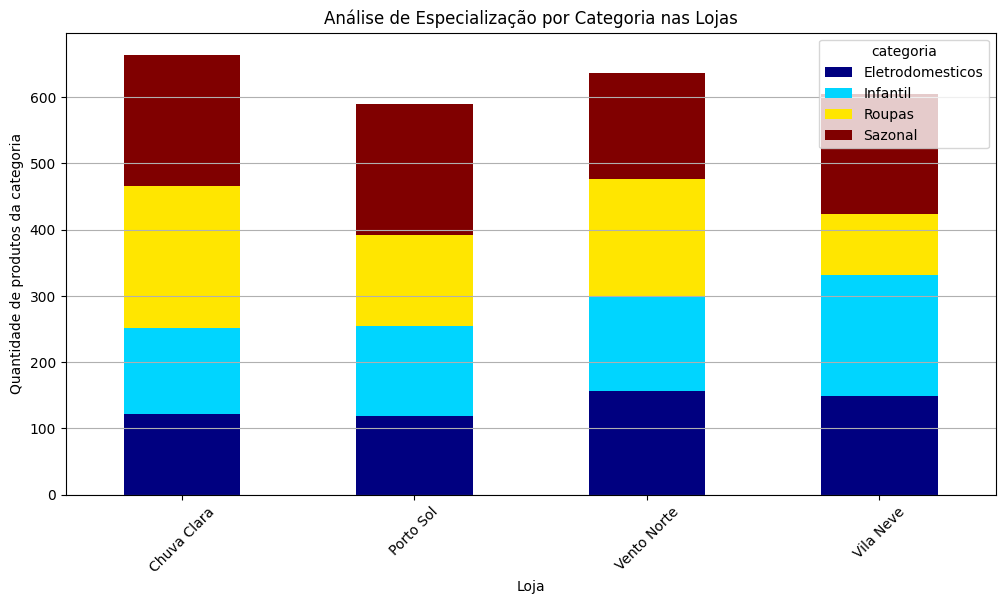

In [10]:
categoria_lojas.plot(kind='bar', stacked=True, figsize=(12,6), colormap='jet')
plt.title('Análise de Especialização por Categoria nas Lojas')
plt.ylabel('Quantidade de produtos da categoria')
plt.xticks(rotation=45)
plt.xlabel('Loja')
plt.ylabel('Quantidade de produtos da categoria')
plt.grid(axis='y', linestyle='-')
plt.show()